# Decision tree regressor
source of tutorial https://towardsdatascience.com/train-a-regression-model-using-a-decision-tree-70012c22bcc1

- non-parametric supervised learning method, capable of finding complex nonlinear relationships in the data
- can perform both classification and regression tasks


## Advantages of decision trees

- Do not require feature scaling
- Can be used for nonlinear data
- Non-parametric: Very few underlying assumptions in data
- Can be used for both regression and classification
- Easy to visualize
- Easy to interpret

## Disadvantages of decision trees

- Decision tree training is computationally expensive, especially when tuning model hyperparameter via k-fold cross-validation
- A small change in the data can cause a large change in the structure of the decision tree

## imports libraries 

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import graphviz

## data
- the popular California housing dataset
- the aim is to build a model for the non-linear features, Longitude and MedHouseVal (Median house value)

In [5]:
df = pd.read_csv('data/cali_housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# to see the non-linear relation between longitude and medhouseval we need to visualise data,
# correlation alone is not able to provide information on that
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:xlabel='Longitude', ylabel='MedHouseVal'>

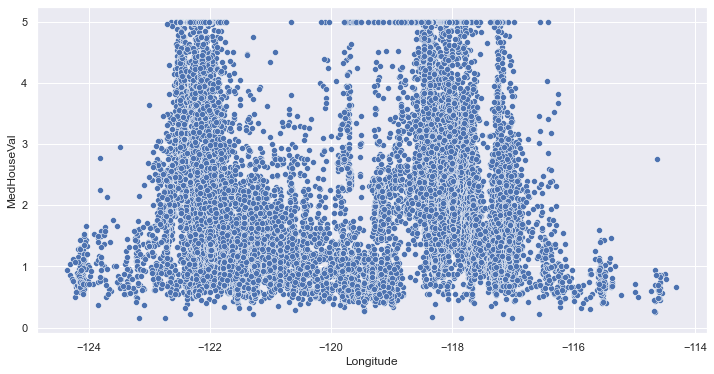

In [19]:
# relation between features
# one may notice a complex, non-linear relation between them
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Longitude'],
                y=df['MedHouseVal'])

## build a model
class sklearn.tree.DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0)

In [28]:
# max_depth = 10

X = df[['Longitude']] #Two-dimensional (pd DataFrame)
y = df['MedHouseVal'] #One-dimensional (pd Series)

#Create an object (model)
clf = DecisionTreeRegressor(max_depth=10,
                             random_state=1)

#Fit (train) the model
clf.fit(X, y)

DecisionTreeRegressor(max_depth=10, random_state=1)

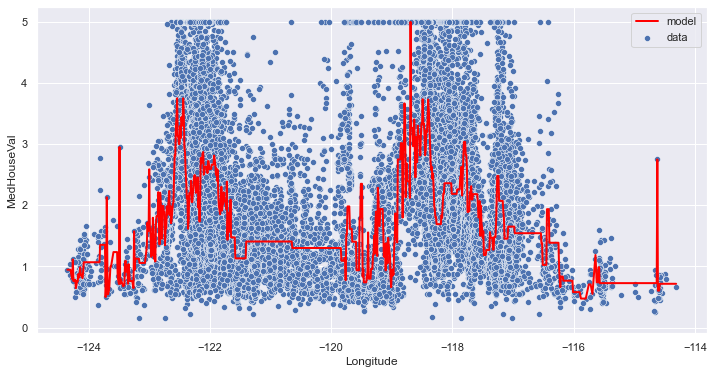

In [30]:
# the model visualisation
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Longitude'],
                y=df['MedHouseVal'],
                label='data')

plt.plot(df['Longitude'].sort_values(),       
         clf.predict(df['Longitude'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)

plt.legend()

## hyperparameters tuning for max_depth to avoid overfitting
- using scikit-learn train_test_split function

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,
                                                    random_state=0,
                                                    shuffle=True)

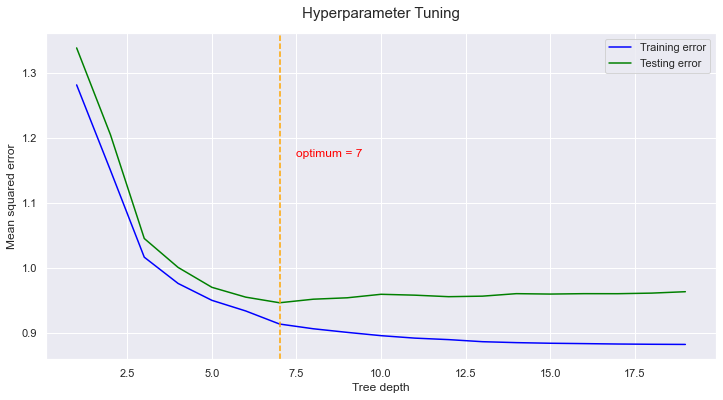

In [35]:
max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.figure(figsize=(12,6))
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=7, color='orange', linestyle='--')
plt.annotate('optimum = 7', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()